### ON BALANCE VOLUME

Determines the correct time to buy and sell stock

In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
import math
import pandas_datareader as web

In [76]:
df = web.DataReader("AMZN", data_source="yahoo", start="2020-03-16", end="2020-09-18")

In [84]:
df["Date"] = df.index

In [85]:
df = df.set_index(pd.DatetimeIndex(df["Date"].values))

In [91]:
df

,High,Low,Open,Close,Volume,Adj Close,Date,OBV,OBV_EMA
2020-03-16,1759.449951,1626.030029,1641.510010,1689.150024,8917300,1689.150024,2020-03-16,0,0.000000e+00
2020-03-17,1857.780029,1689.239990,1775.469971,1807.839966,10917100,1807.839966,2020-03-17,10917100,5.731478e+06
2020-03-18,1841.660034,1745.000000,1750.000000,1830.000000,9645200,1830.000000,2020-03-18,20562300,1.117727e+07
2020-03-19,1945.000000,1832.650024,1860.000000,1880.930054,10399900,1880.930054,2020-03-19,30962200,1.688887e+07
2020-03-20,1957.000000,1820.729980,1926.310059,1846.089966,9817900,1846.089966,2020-03-20,30962200,2.029309e+07
...,...,...,...,...,...,...,...,...,...
2020-09-14,3187.389893,3096.000000,3172.939941,3102.969971,4529600,3102.969971,2020-09-14,386183700,3.688073e+08
2020-09-15,3175.020020,3108.919922,3136.159912,3156.129883,4021500,3156.129883,2020-09-15,390205200,3.708452e+08
2020-09-16,3187.239990,3074.149902,3179.989990,3078.100098,4512200,3078.100098,2020-09-16,390205200,3.726890e+08
2020-09-17,3029.429932,2972.550049,3009.250000,3008.729980,6449100,3008.729980,2020-09-17,390205200,3.743572e+08


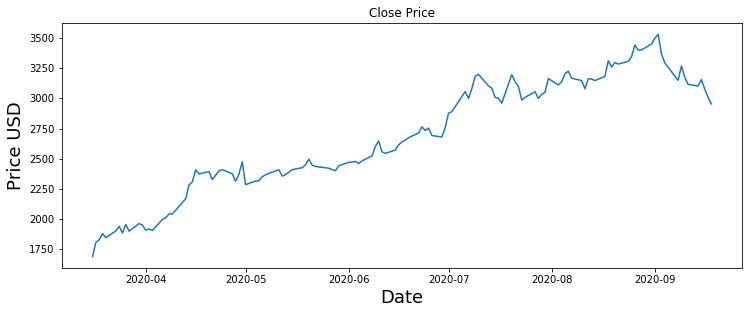

In [86]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df["Close"], label = "Close")
plt.title("Close Price")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Price USD", fontsize = 18)
plt.show()

In [104]:
#Calculate the On Balance Volume (OBV)
OBV = []
OBV.append(0)

#Loop through the data set from the second row (index1) to the end of the data set
for i in range(1, len(df.Close)):
    if df.Close[i] > df.Close[i-1]:
        OBV.append(OBV[-1] + df.Volume[i])
    elif df.Close[i] < df.Close[i-1]:
        OBV.append(OBV[-1] - df.Volume[i])
    else:
        OBV.append(OBV[-1])

In [105]:
#Store the OBV and the Exponential Moving Average into new columns
df["OBV"] = OBV
df["OBV_EMA"] = df["OBV"].ewm(span=20).mean()

In [113]:
df

,High,Low,Open,Close,Volume,Adj Close,Date,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
2020-03-16,1759.449951,1626.030029,1641.510010,1689.150024,8917300,1689.150024,2020-03-16,0,0.000000e+00,NaN,NaN
2020-03-17,1857.780029,1689.239990,1775.469971,1807.839966,10917100,1807.839966,2020-03-17,10917100,5.731478e+06,1807.839966,NaN
2020-03-18,1841.660034,1745.000000,1750.000000,1830.000000,9645200,1830.000000,2020-03-18,20562300,1.117727e+07,NaN,NaN
2020-03-19,1945.000000,1832.650024,1860.000000,1880.930054,10399900,1880.930054,2020-03-19,30962200,1.688887e+07,NaN,NaN
2020-03-20,1957.000000,1820.729980,1926.310059,1846.089966,9817900,1846.089966,2020-03-20,21144300,1.791822e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,3187.389893,3096.000000,3172.939941,3102.969971,4529600,3102.969971,2020-09-14,130623800,1.435580e+08,NaN,NaN
2020-09-15,3175.020020,3108.919922,3136.159912,3156.129883,4021500,3156.129883,2020-09-15,134645300,1.427092e+08,NaN,NaN
2020-09-16,3187.239990,3074.149902,3179.989990,3078.100098,4512200,3078.100098,2020-09-16,130133100,1.415114e+08,NaN,NaN
2020-09-17,3029.429932,2972.550049,3009.250000,3008.729980,6449100,3008.729980,2020-09-17,123684000,1.398136e+08,NaN,NaN


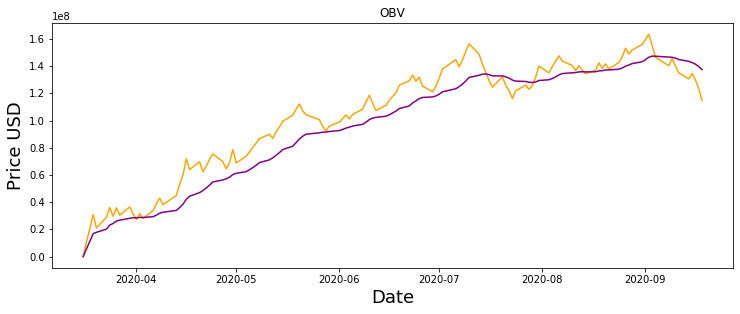

In [107]:
#Create and plot the graph
plt.figure(figsize=(12.2, 4.5))
plt.plot(df["OBV"], label = "OBV", color = "orange")
plt.plot(df["OBV_EMA"], label = "OBV_EMA", color = "purple")
plt.title("OBV")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Price USD", fontsize = 18)
plt.show()


La idea de este método es comprar cuando la línea de OBV está por encima de la línea de OBV_EMA.

In [108]:
#Create a function to signal when to buy and when to sell the stock
#IF OBV > OBV_EMA then Buy
#If OBV < OBV_EMA then sell
#else do nothing

In [109]:
def buy_sell(signal, col1, col2):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    #Loop through the lenght of the data set
    for i in range(0, len(signal)):
        #IF OBV > OBV_EMA then Buy
        if signal[col1][i] > signal[col2][i] and flag != 1:
            sigPriceBuy.append(signal["Close"][i])
            sigPriceSell.append(np.nan)
            flag = 1
        #If OBV < OBV_EMA then sell
        elif signal[col1][i] < signal[col2][i] and flag != 0:
            sigPriceSell.append(signal["Close"][i])
            sigPriceBuy.append(np.nan)
            flag = 0
        else:
            sigPriceSell.append(np.nan)
            sigPriceBuy.append(np.nan)
    return (sigPriceBuy, sigPriceSell)

In [110]:
#Create buy and sell columns 
x = buy_sell(df, "OBV", "OBV_EMA")
df["Buy_Signal_Price"] = x[0]
df["Sell_Signal_Price"] = x[1]

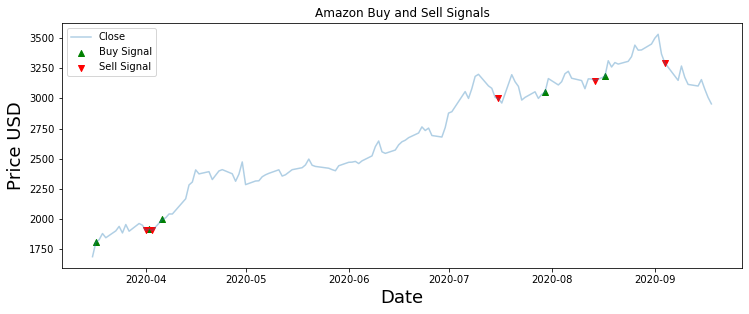

In [112]:
#Plot the result
plt.figure(figsize=(12.2, 4.5))
plt.plot(df["Close"], label = "Close", alpha = 0.35)
plt.scatter(df.index, df["Buy_Signal_Price"], label = "Buy Signal", marker =  "^", alpha = 1, color = "green")
plt.scatter(df.index, df["Sell_Signal_Price"], label = "Sell Signal", marker = "v", alpha = 1, color = "red")
plt.title("Amazon Buy and Sell Signals")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Price USD", fontsize = 18)
plt.legend(loc = "upper left")
plt.show()

OBV it´s not a perfect indicator, there is none that is, we need to use other indicators for more information in where to buy and sell the stock

Let´s try it with another stock

In [114]:
df = web.DataReader("SAN", data_source="yahoo", start="2020-03-16", end="2020-09-18")

In [115]:
#Calculate the On Balance Volume (OBV)
OBV = []
OBV.append(0)

#Loop through the data set from the second row (index1) to the end of the data set
for i in range(1, len(df.Close)):
    if df.Close[i] > df.Close[i-1]:
        OBV.append(OBV[-1] + df.Volume[i])
    elif df.Close[i] < df.Close[i-1]:
        OBV.append(OBV[-1] - df.Volume[i])
    else:
        OBV.append(OBV[-1])

In [116]:
#Store the OBV and the Exponential Moving Average into new columns
df["OBV"] = OBV
df["OBV_EMA"] = df["OBV"].ewm(span=20).mean()

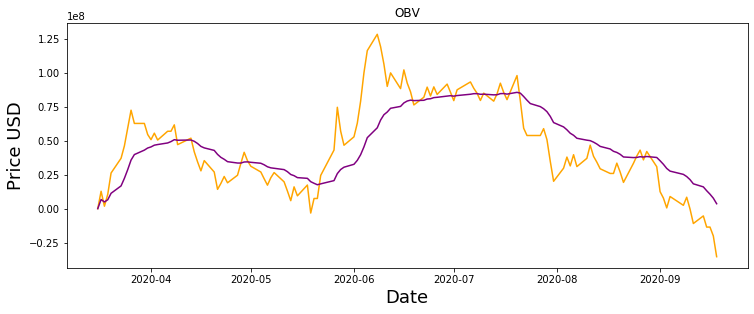

In [117]:
#Create and plot the graph
plt.figure(figsize=(12.2, 4.5))
plt.plot(df["OBV"], label = "OBV", color = "orange")
plt.plot(df["OBV_EMA"], label = "OBV_EMA", color = "purple")
plt.title("OBV")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Price USD", fontsize = 18)
plt.show()


In [118]:
x = buy_sell(df, "OBV", "OBV_EMA")
df["Buy_Signal_Price"] = x[0]
df["Sell_Signal_Price"] = x[1]

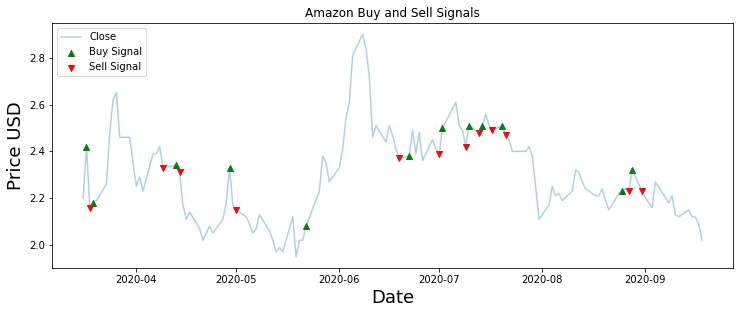

In [119]:
#Plot the result
plt.figure(figsize=(12.2, 4.5))
plt.plot(df["Close"], label = "Close", alpha = 0.35)
plt.scatter(df.index, df["Buy_Signal_Price"], label = "Buy Signal", marker =  "^", alpha = 1, color = "green")
plt.scatter(df.index, df["Sell_Signal_Price"], label = "Sell Signal", marker = "v", alpha = 1, color = "red")
plt.title("Amazon Buy and Sell Signals")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Price USD", fontsize = 18)
plt.legend(loc = "upper left")
plt.show()